# Bank Marketing Campaign Classification

### Created By : Harry Maulana Buhari
---

## Business Problem Understanding

**`Context`**

Bank A is a financial institution that provides various financial products and services. One financial product that is well known to the public is a time deposit. The mechanism of a time deposit is that the customer deposits a certain amount of money in a bank or financial institution, and the money can only be taken after a certain period of time. As compensation, the customer will be given a fixed interest rate according to the amount of money deposited.

However, as a business entity that has its own financial products and customers, banks still have to compete in order not to lose customers. One way to do this is through marketing campaigns.

**`Problem Statement`**

Marketing campaigns can be wasteful of time and resources if the bank targets all customers without filtering them out. This is because if the marketing campaign is targeted to all customers, the time and money will be wasted if the customers will not deposit.

With this, the bank's marketing team wants to improve the efficiency of the marketing campaign by knowing which customers have a high chance of depositing so that the time and resources used can be more efficient.

**`Goals`**

Among many bank customers, it would take a lot of time and money to manually select customers who have a high potential to deposit. Therefore, the bank's marketing team would like to have the ability to predict the possibility that a customer will deposit or not to make the marketing campaign run more efficiently.

In addition, they also want to know what factors make customers want to deposit or not. By doing so, they can plan a much better way to approach these customers.

**`Analytic Approach`**

Based on the problem, we will analyze the data to find patterns that distinguish customers who will deposit and those who will not.

We will then create a classification model that will help banks predict the probability that a customer will deposit or not.

The purpose of this classification is basically to help banks optimize their marketing efforts in a more effective way.

The specific objectives of doing this classification include the following.

1. `Identify potential target markets`</p>
    By analyzing existing customer data, classification can help identify groups of customers who have a high propensity to make deposits. This allows banks to focus on target markets that have high potential to generate more revenue.

1. `Development of an appropriate marketing strategy`</p>
    By understanding the characteristics and needs of customers who are likely to make deposits, companies can develop more appropriate and relevant marketing strategies. For example, they can customize their marketing messages, communication channels or product offerings to suit the needs and preferences of potential customers.

1. `More efficient resource management`</p>
    With good classification, banks can allocate their resources more efficiently. They can reduce unnecessary costs and effort in marketing their products or services to customers who have a low propensity to deposit. Instead, they can focus their marketing efforts on customers who are more likely to deposit, generating better results using the minimum available resources.

**Metric Evaluation**

Target :
* 0 : Nasabah `not deposit`
* 1 : Nasabah `deposit`

Type Error:
* FP (False Positive) : Customer was predicted to deposit but did not</p>
    FP Consequences: Time and resources spent on the customer will be wasted.

* FN (False Negative) : Customer was predicted not to deposit but did deposit</p>
    FN Consequences: The bank will lose the opportunity to be able to benefit from customers who can actually deposit

Consequently, recall and precision are important in this case so we will use F-Score metrics. Note that the main goal of the bank's marketing campaign is to attract more customers to deposit. Therefore, we will build a model that can predict as many true positive classes as possible and as few false positive and false negative predictions as possible.

Then, our priority will be aimed at reducing False Negative so that the bank does not lose the opportunity to get depositing customers. Since False Negative is the priority, the recall of the model will be prioritized to be improved. Therefore, the F-Score `metrics` used is `F2-Score`.

---
## Data Understanding

The Dataset Source can be accessed [here](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW).

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Integer | Customer's Age |
| job | Object | Customer's Job |
| balance | Integer | Customer's Balance |
| housing | Object | Having a home credit or not |
| loan | Object | Having a loan or not |
| contact | Object | The last type of communication made to customers |
| month | Object | Last month of contact with customer |
| campaign | Integer | Number of contacts made with customers during the campaign |
| pdays | Integer | Number of days after the customer was contacted since the last campaign |
| poutcome | Object | Result of the last campaign |
| deposit | Object | Customer makes a deposit or not |

In [58]:
# Library
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Preprocessing, Feature Engineering, and Feature Selection
from sklearn.preprocessing import OneHotEncoder, RobustScaler, KBinsDiscretizer
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, make_scorer, fbeta_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv("data_bank_marketing_campaign.csv")
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


### Check whether the dataset is balanced or not

In [61]:
df["deposit"].value_counts().reset_index()

,index,deposit
0,no,4081
1,yes,3732


It can be seen that the dataset used is `balanced` with the proportion ratio between `no` and `yes` being `52(%)` : `48(%)`. Because the dataset is balanced, we do not need to do resampling.

### Check whether the dataset has duplicates or not

In [62]:
df_duplicate = df[df.duplicated(keep = False)].sort_values("age")

display(df_duplicate, f"Total of duplicate data : {len(df[df.duplicated()])}")

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2486,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes
1468,34,management,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
223,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
1381,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
330,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no


'Total of duplicate data : 8'

There are 8 duplicates found in the data. On further observation, we can see that the data in each column is exactly the same, whether it is customer profile data or marketing data for the customer. 

In the context of customer classification for marketing purposes, duplicate data that does not have a primary key can be a problem because it can cause distortion in analysis and decision making. For example, if there are multiple entries with similar but not completely identical attribute values, it is possible that the data represents different customers who share certain similarities in their attributes.

To resolve this situation, we will try to `analyze` whether the data is a duplicate through `other features` that exist in the dataset. In the dataset we see that the duplicates have the same balance, same housing loan status, same loan status, and even some of the marketing done on them are also the same. For job, housing, loan, month, and some other categorical features if they have the same data, it is still reasonable. But if we emphasize on the balance feature which is continuous numerical data, it is extremely rare if there is a customer who has the same balance with the same age and several other features. Therefore, these `eight` `data` that are `duplicate` will be `deleted`.

In [63]:
len_before = len(df)
df = df.drop_duplicates()
len_after = len(df)

print(f"Length before duplicate data is removed : {len_before}")
print(f"Length after duplicate data is removed : {len_after}")

Length before duplicate data is removed : 7813
Length after duplicate data is removed : 7805


### Check whether there is outlier data or not

From the dataset, there are 4 columns that are numerical data, which are age, balance, campaign, and pdays.

<Axes: ylabel='pdays'>

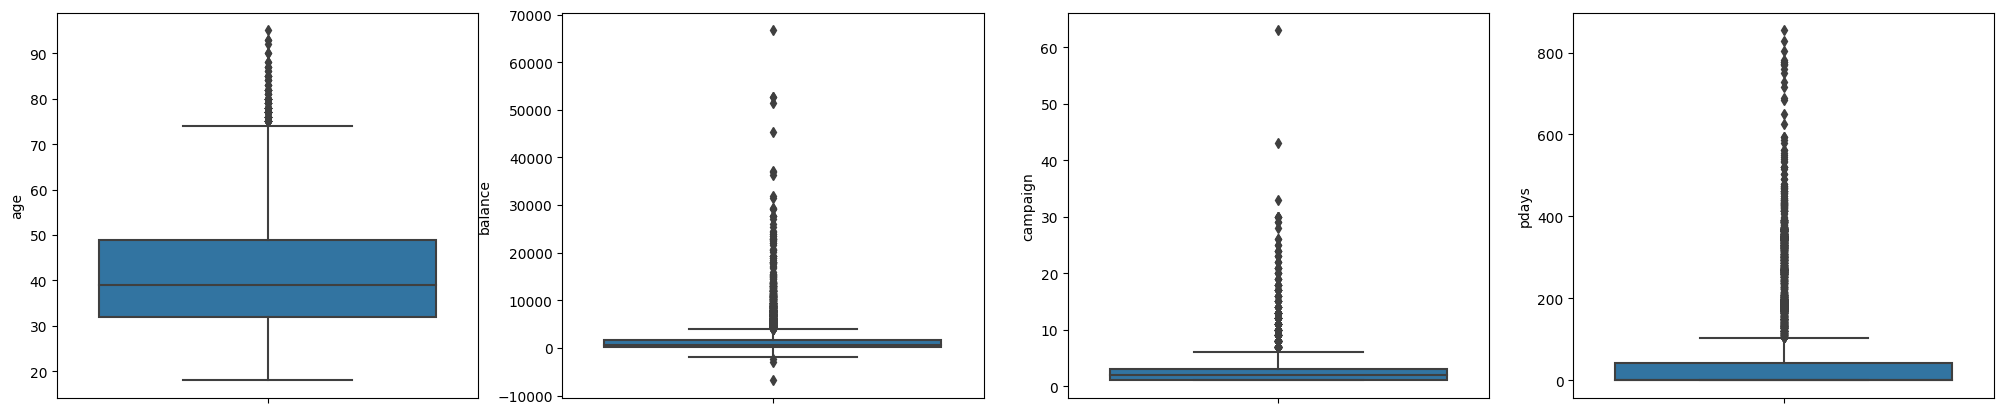

In [64]:
fig, ax = plt.subplots(1, 4, figsize = (25, 5))
sns.boxplot(data = df, y = "age", ax = ax[0])
sns.boxplot(data = df, y = "balance", ax = ax[1])
sns.boxplot(data = df, y = "campaign", ax = ax[2])
sns.boxplot(data = df, y = "pdays", ax = ax[3])

From the four existing features, it will then be analyzed whether the data is really an outlier or not.

`balance` feature

In [65]:
df = df.drop(df[df["balance"] == df["balance"].max()].index)
df.sort_values("balance", ascending = False)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
3335,61,self-employed,52587,no,no,cellular,aug,1,-1,unknown,yes
5683,61,self-employed,52587,no,no,cellular,feb,3,189,success,yes
178,56,entrepreneur,51439,no,yes,cellular,jul,1,-1,unknown,no
6677,39,technician,45248,yes,no,unknown,may,1,-1,unknown,yes
1008,75,retired,37127,no,no,cellular,feb,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
935,51,technician,-1944,yes,no,cellular,may,1,-1,unknown,yes
4243,49,entrepreneur,-1965,no,yes,telephone,jul,2,-1,unknown,no
6761,51,management,-2282,yes,yes,cellular,jul,6,-1,unknown,no
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes


On the `balance` feature, it can also be seen that there are some `negative` values. Negative balances on accounts can occur for several reasons such as service fees, fines, or incorrect transaction processing. This is actually a very rare case as it is unlikely that any bank will allow customers to have negative balance protection within a certain limit. In fact, in most cases, this negative balance is considered a liability that must be settled immediately. If not settled within a certain time, the customer may face more serious consequences such as restriction of access to the account or even legal action.

So based on domain knowledge as mentioned earlier, `data` that has a `negative` `balance` will be `dropped`.

In [66]:
df[df["balance"]<0].sort_values("balance")

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7499,49,management,-6847,no,yes,cellular,jul,1,-1,unknown,no
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
6761,51,management,-2282,yes,yes,cellular,jul,6,-1,unknown,no
4243,49,entrepreneur,-1965,no,yes,telephone,jul,2,-1,unknown,no
935,51,technician,-1944,yes,no,cellular,may,1,-1,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
7662,32,technician,-1,yes,no,cellular,may,1,-1,unknown,no
2758,57,technician,-1,no,no,unknown,may,2,-1,unknown,yes
3397,34,blue-collar,-1,yes,no,cellular,may,6,355,other,yes
4185,56,blue-collar,-1,no,no,cellular,jul,3,-1,unknown,no


In [67]:
df = df.drop(df[df["balance"]<0].sort_values("balance").index)

In [68]:
len(df)

7325

`age` feature

In [69]:
df[df["age"] > 75].sort_values("age", ascending = False)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
3371,95,retired,2282,no,no,telephone,apr,17,-1,unknown,yes
546,93,retired,775,no,no,cellular,aug,2,13,success,yes
1565,93,retired,775,no,no,cellular,jul,2,177,success,yes
1462,92,retired,775,no,no,cellular,jan,4,96,success,yes
7303,90,retired,712,no,no,telephone,mar,1,-1,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
4101,76,retired,802,no,no,cellular,mar,1,181,success,yes
5484,76,retired,1492,no,no,telephone,nov,1,-1,unknown,yes
1847,76,retired,2302,no,no,telephone,feb,1,87,failure,no
2047,76,housemaid,1411,no,no,telephone,apr,3,-1,unknown,yes


For the age feature with several outliers, it will not be dropped because customers with 95 years of age are still considered normal even though they are very rare.

`pdays` feature

In [70]:
df[df["pdays"] == -1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


A value of `-1` in `pdays` means that the marketing team just contacted the customer, therefore the customer's `poutcome` is `unknown`.

In [71]:
df.sort_values('pdays', ascending = False).head(20)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7409,37,management,488,yes,no,cellular,sep,1,854,failure,yes
1175,34,blue-collar,320,yes,no,cellular,aug,1,828,failure,yes
6918,32,technician,1547,no,no,cellular,oct,1,805,other,yes
399,31,blue-collar,0,yes,no,unknown,aug,1,782,other,yes
1324,27,blue-collar,821,yes,yes,unknown,sep,1,778,other,no
3315,37,technician,432,yes,no,cellular,jul,3,776,failure,yes
5768,36,management,335,no,no,unknown,oct,1,772,failure,no
3165,35,management,1120,no,no,unknown,sep,1,771,success,no
7115,38,management,1477,no,no,cellular,sep,3,769,failure,yes
4683,60,services,4256,yes,no,cellular,aug,3,761,other,yes


For some of these `pdays` that are too high (outliers) `will not be dropped` because there may be some customers who have not had time to be reached out by the marketing team in the last few years and it is still fairly reasonable.

Feature `campaign`

In [72]:
df.sort_values("campaign", ascending = False).head(20)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
548,45,management,9051,yes,no,unknown,may,63,-1,unknown,no
6901,51,blue-collar,41,yes,no,telephone,jul,43,-1,unknown,no
1599,49,services,933,no,yes,cellular,jul,33,-1,unknown,no
2371,35,management,3168,no,no,cellular,aug,30,-1,unknown,no
6288,33,technician,34,no,no,cellular,aug,30,-1,unknown,no
67,51,services,7,yes,no,cellular,jul,30,-1,unknown,no
2564,44,services,608,yes,yes,unknown,jun,30,-1,unknown,no
4711,46,housemaid,271,yes,no,cellular,jul,29,-1,unknown,yes
6480,58,admin.,1464,yes,yes,unknown,jun,29,-1,unknown,no
304,38,blue-collar,1686,yes,no,unknown,jun,28,-1,unknown,no


For the `campaign` column, the highest value is 63. This value is still considered reasonable because there may be some customers who are often contacted for campaigns. Therefore, we will not drop the data based on the campaign column.

After we drop some data that are outliers, we will `recheck` whether the data is still `balanced` or `not`.

In [73]:
df["deposit"].value_counts()

no     3735
yes    3590
Name: deposit, dtype: int64

### Check for missing values

In [74]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

<Axes: >

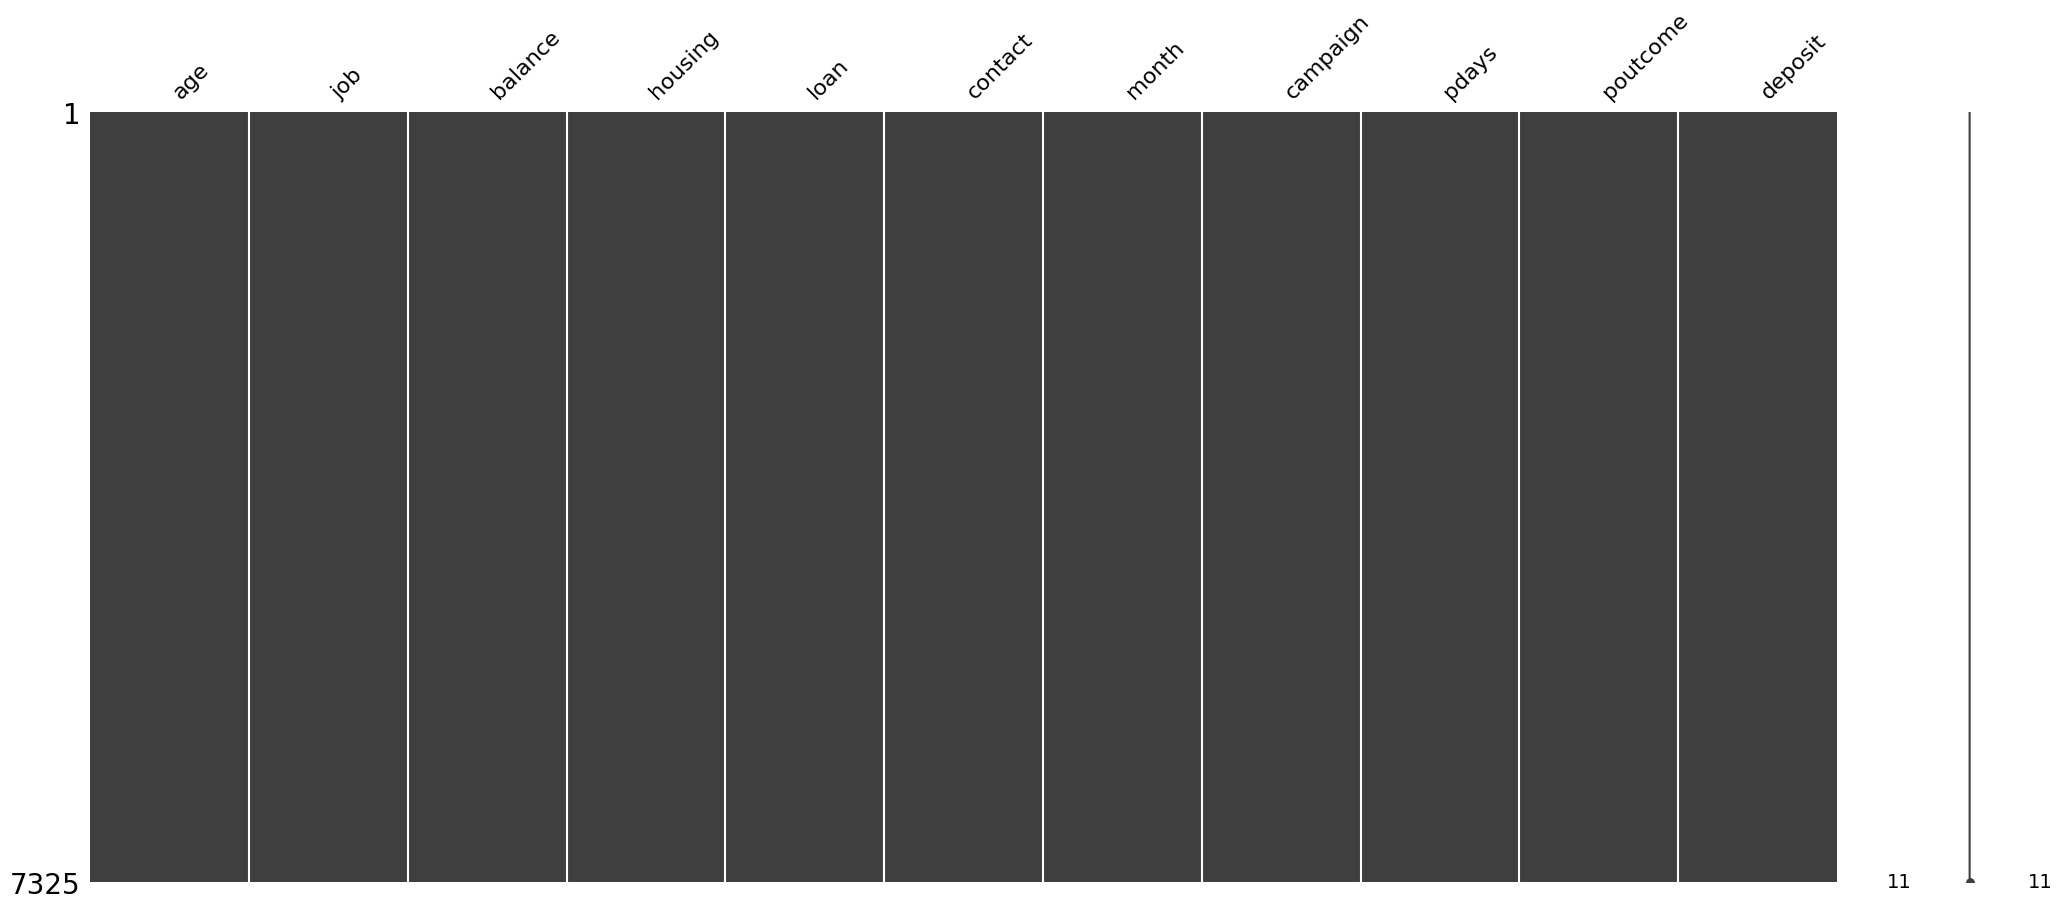

In [75]:
missingno.matrix(df)

In this dataset we can see that there is `no missing value`.

### Check Data Types

In [76]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.describe(include = object).columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_val = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_val

,Column Name,Number of Unique,Unique Sample
0,job,12,"[admin., housemaid, technician, management, student, services, blue-collar, entrepreneur, retired, unemployed, self-employed, unknown]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, unknown]"
4,month,12,"[jun, may, nov, jan, sep, feb, mar, aug, apr, jul, oct, dec]"
5,poutcome,4,"[unknown, other, failure, success]"
6,deposit,2,"[yes, no]"


As can be seen, some values in the object column have values which include `unknown` and `other`. To make the data more consistent, we will change the `unknown` value to `other` in the `job` and `contact` columns. As for the `poutcome` column, we will not change it because the meaning of the values `unknown` and `other` are different, where `unknown` in this column means that the result of the last campaign after being contacted is unknown, while `other` itself already has the result of the previous campaign but the value is other than failure or success.

In [77]:
def unknowns(x):
    if x == "unknown":
        x = "other"
    return x

df["contact"] = df["contact"].apply(unknowns)
df["contact"].unique()

array(['cellular', 'telephone', 'other'], dtype=object)

In [78]:
df["job"] = df["job"].apply(unknowns)
df["job"].unique()

array(['admin.', 'housemaid', 'technician', 'management', 'student',
       'services', 'blue-collar', 'entrepreneur', 'retired', 'unemployed',
       'self-employed', 'other'], dtype=object)

Now that the dataset has been cleaned, we will move on to the data analysis process to understand the condition of the dataset better.

---
## Data Analysis

In [79]:
display(df.describe(), df.describe(include = "object"))

,age,balance,campaign,pdays
count,7325.00000,7325.000000,7325.000000,7325.000000
mean,41.35686,1626.027577,2.506348,52.396451
std,12.05264,3057.490750,2.713091,108.360776
min,18.00000,0.000000,1.000000,-1.000000
25%,32.00000,187.000000,1.000000,-1.000000
50%,39.00000,620.000000,2.000000,-1.000000
75%,49.00000,1808.000000,3.000000,77.000000
max,95.00000,52587.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7325,7325,7325,7325,7325,7325,7325
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1716,4014,6455,5332,1768,5396,3735


Based on the descriptive statistics above, we can see that: 
1. The `lowest` customer age is `18` years old and the `highest` customer age is `95` years old.
1. The average balance of customers is around `1626` dollars.
1. The `most` customer`s `job` is `management`.
1. Most customers do not have `housing` or `loans`.
1. Most customers have been contacted and are still waiting for the outcome of the campaign.
1. Most customers `did not make a `deposit`.

<Axes: xlabel='deposit', ylabel='pdays'>

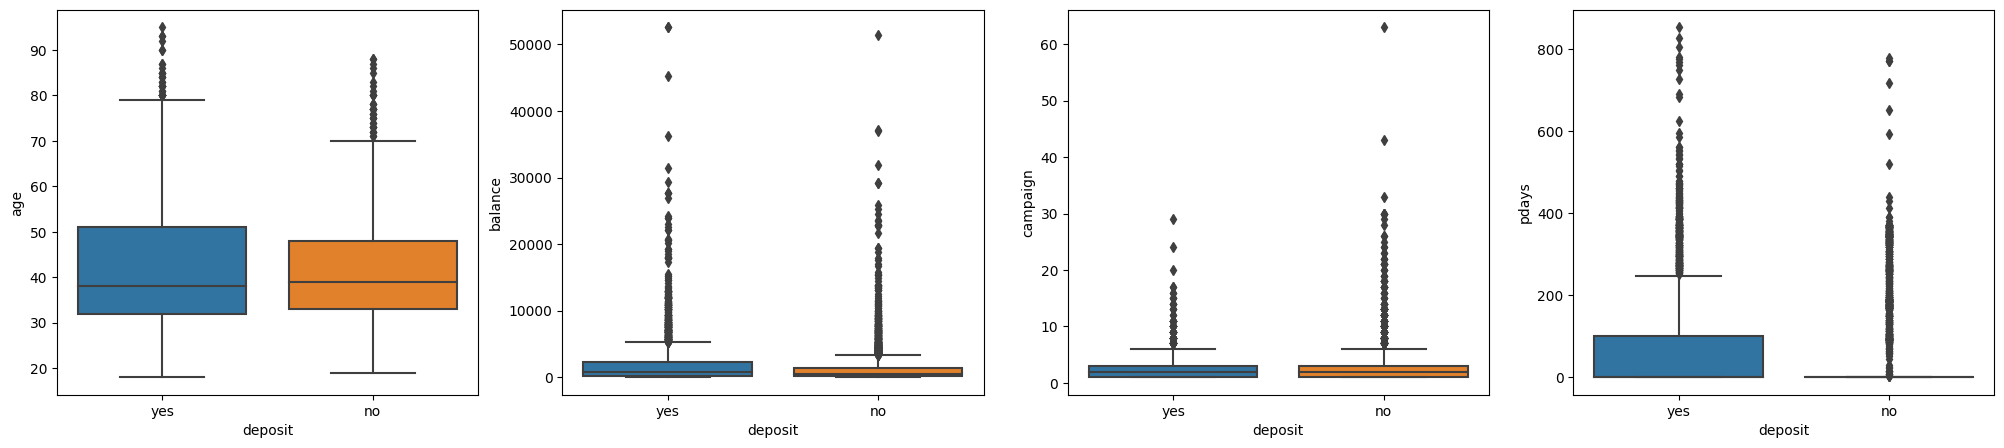

In [80]:
fig, ax = plt.subplots(1, 4, figsize = (25, 5))
sns.boxplot(data = df, y = "age", x = "deposit", ax = ax[0])
sns.boxplot(data = df, y = "balance", x = "deposit", ax = ax[1])
sns.boxplot(data = df, y = "campaign", x = "deposit", ax = ax[2])
sns.boxplot(data = df, y = "pdays", x = "deposit", ax = ax[3])

Based on the boxplot above, we can conclude that the distribution of the 4 features is right skewed.

Next, we will try to analyze the category features in the dataset.

In [81]:
df_month = pd.crosstab(df["month"], df["deposit"]).reindex(["jan", 
                                                            "feb", 
                                                            "mar", 
                                                            "apr", 
                                                            "may", 
                                                            "jun", 
                                                            "jul", 
                                                            "aug", 
                                                            "sep", 
                                                            "oct", 
                                                            "nov", 
                                                            "dec"]).reset_index()
df_month

deposit,month,no,yes
0,jan,121,98
1,feb,220,294
2,mar,22,171
3,apr,236,408
4,may,1165,603
5,jun,438,366
6,jul,546,397
7,aug,553,488
8,sep,34,176
9,oct,43,241


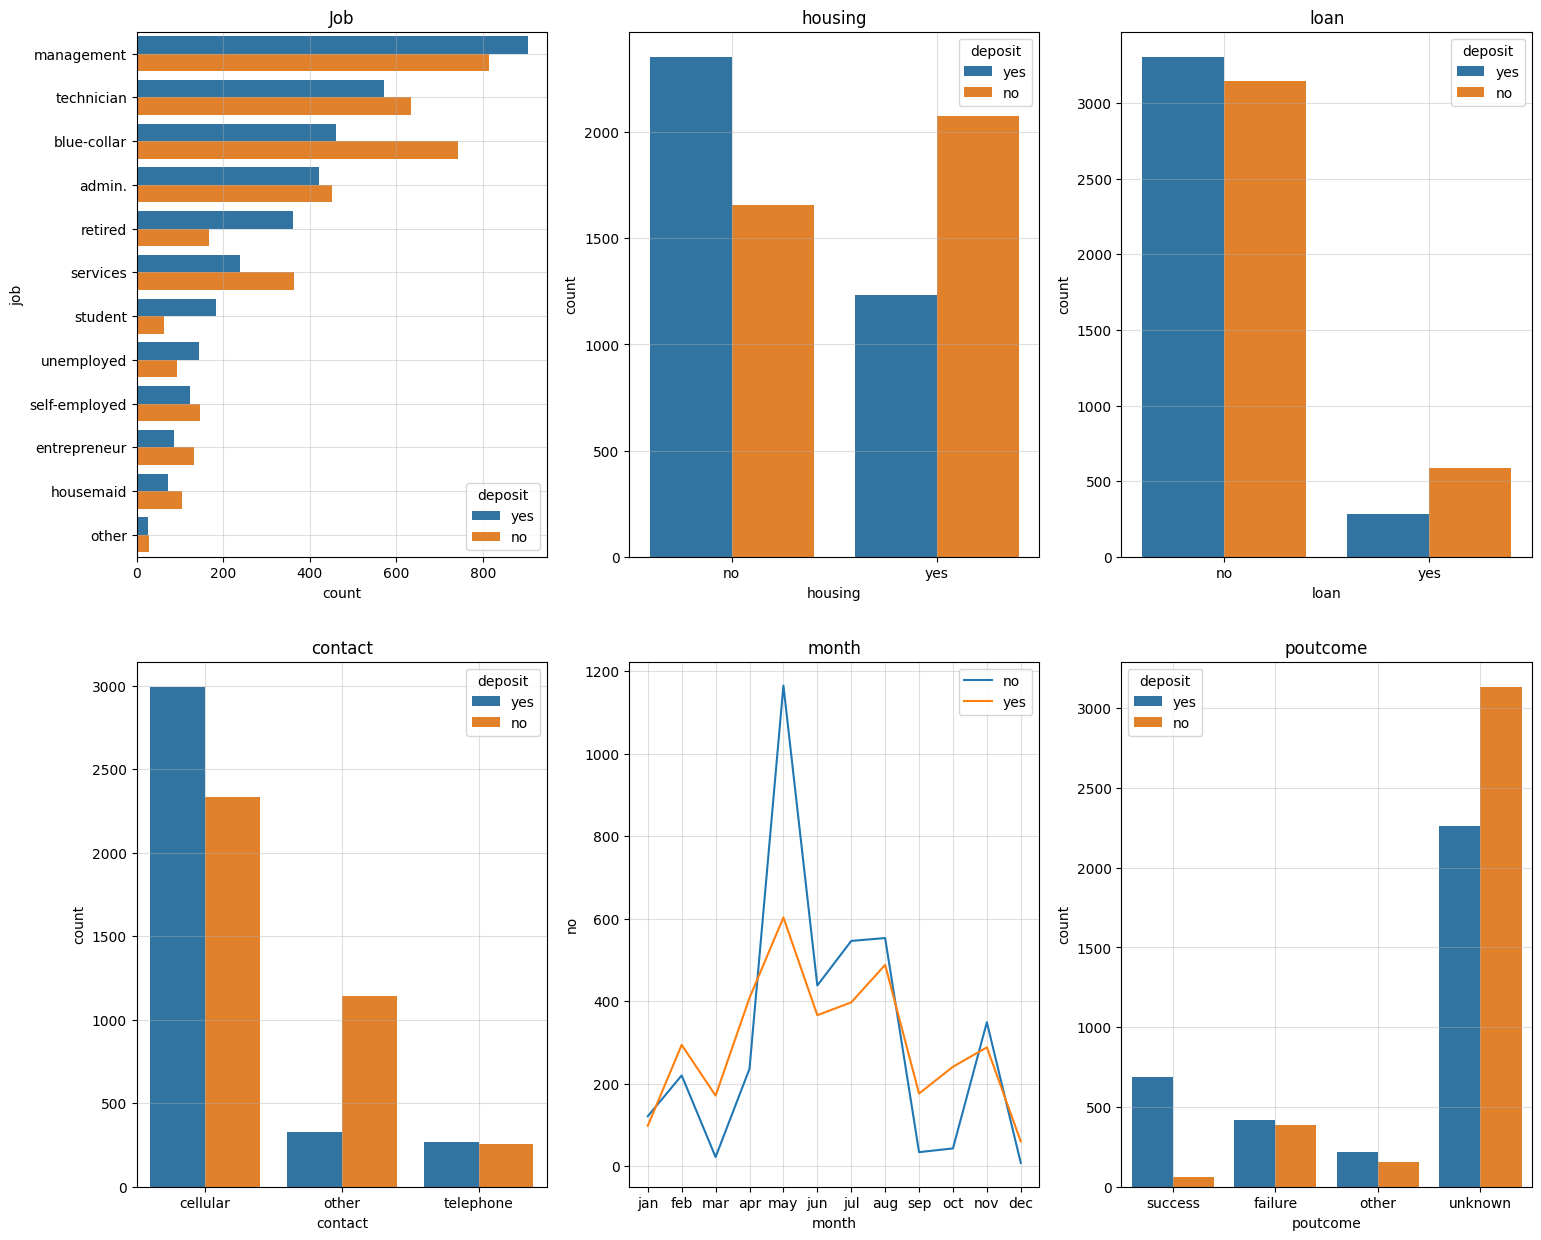

In [82]:
fig, ax = plt.subplots(2, 3, figsize = (18, 15))
sns.countplot(data = df, y = "job", hue = "deposit", order = ["management",
                                                              "technician", 
                                                              "blue-collar", 
                                                              "admin.",
                                                              "retired",
                                                              "services",
                                                              "student",
                                                              "unemployed",
                                                              "self-employed",
                                                              "entrepreneur",
                                                              "housemaid",
                                                              "other"], ax = ax[0][0], )
ax[0][0].set_title("Job")
ax[0][0].grid(alpha = 0.4)

sns.countplot(data = df, x = "housing", hue = "deposit", order = ["no", "yes"], ax = ax[0][1])
ax[0][1].set_title("housing")
ax[0][1].grid(alpha = 0.4)

sns.countplot(data = df, x = "loan", hue = "deposit", order = ["no", "yes"], ax = ax[0][2])
ax[0][2].set_title("loan")
ax[0][2].grid(alpha = 0.4)

sns.countplot(data = df, x = "contact", hue = "deposit", order = ["cellular", "other", "telephone"], ax = ax[1][0])
ax[1][0].set_title("contact")
ax[1][0].grid(alpha = 0.4)

sns.lineplot(data = df_month, x = "month", y = "no", ax = ax[1][1], label = "no")
sns.lineplot(data = df_month, x = "month", y = "yes", ax = ax[1][1], label = "yes")
ax[1][1].set_title("month")
ax[1][1].grid(alpha = 0.4)
ax[1][1].legend()


sns.countplot(data = df, x = "poutcome", hue = "deposit", order = ["success", "failure", "other", "unknown"], ax = ax[1][2])
ax[1][2].set_title("poutcome")
ax[1][2].grid(alpha = 0.4)

Based on the visualization above, we can conclude that:
1. If sorted by `job`, the 5 customer jobs that tend to `deposit a lot` are `management`, `technician`, `blue``-collar`, `admin`, and `retired`.
2. Customers who `do not have a home loan` will tend to make `deposits`.
3. Customers who `do not have a loan` will tend to make a `deposit`.
4. Customers who are `contacted` via `cellular` are more likely to make a `deposit`.
5. Customers who are `contacted` in the months of `April to August` are more likely to make a `deposit` when compared to other months.
6. Customers who `received a campaign` are more likely to make a `deposit`. As for the `unknown` both those who are counted as deposit or not are actually `still data from the previous campaign`. This data will usually be `updated within a certain period of time after` a `campaign` is conducted to see if the customer deposits or not.

After doing analysis to understand the existing dataset. Next we will start doing Data Preprocessing.

---
## Data Preprocessing

### Define X and y

First, we will define the features and targets.

In [83]:
df["deposit"] = np.where(df["deposit"] == "yes", 1, 0)
X = df.drop(columns = "deposit")
y = df["deposit"]

display(X.head(), y.head())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown
2,51,admin.,3025,no,no,cellular,may,1,352,other
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown
7,36,technician,911,yes,yes,cellular,may,2,21,failure


0    1
2    1
4    0
6    1
7    1
Name: deposit, dtype: int32

After the features and targets have been defined. The next step is to divide the dataset into training data and testing data.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [85]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1


Next, we will classify each feature for preprocessing.

In [86]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in X.describe(include = object).columns :
    listItem.append( [col, X[col].nunique(), X[col].unique()])

unique_val = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
display(df.describe().transpose(), unique_val)

,count,mean,std,min,25%,50%,75%,max
age,7325.0,41.356860,12.052640,18.0,32.0,39.0,49.0,95.0
balance,7325.0,1626.027577,3057.490750,0.0,187.0,620.0,1808.0,52587.0
campaign,7325.0,2.506348,2.713091,1.0,1.0,2.0,3.0,63.0
pdays,7325.0,52.396451,108.360776,-1.0,-1.0,-1.0,77.0,854.0
deposit,7325.0,0.490102,0.499936,0.0,0.0,0.0,1.0,1.0


,Column Name,Number of Unique,Unique Sample
0,job,12,"[admin., housemaid, technician, management, student, services, blue-collar, entrepreneur, retired, unemployed, self-employed, other]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, other]"
4,month,12,"[jun, may, nov, jan, sep, feb, mar, aug, apr, jul, oct, dec]"
5,poutcome,4,"[unknown, other, failure, success]"


Based on the value of each feature whether it is numerical or categorical, we will perform :
1. We will do `One Hot Encoding` for `housing`, `loan`, `contact` and `outcome` features. This is because these 4 features do not have a specific order/rank, and the n_unique is small.
1. We will do `Ordinal Encoding` for the `month` feature. This is because month has an order from January to December.
1. We will do `Binary Encoding` for the `job` feature. This is because this feature has no particular order/level and has many n_uniques.
1. We will do `Robust Scaling` for features `age`, `balance`, `campaign` and `pdays`. This is because these 4 features have outliers and scaling that can handle outliers while maintaining data distribution can be done using Robust Scaler.

In [87]:
ordinal_mapping = [
    {"col" : "month", "mapping" : {"jan" : 0, "feb" : 1, "mar" : 2, "apr" : 3, "may" : 4, "jun" : 5, "jul" : 6, "aug" : 7,
                                   "sep" : 8, "oct" : 9, "nov" : 10, "dec" : 11}}
]

pipe_ord_robust = Pipeline([
    ("ordinal", OrdinalEncoder(cols = ["month"], mapping = ordinal_mapping)),
    ("robust", RobustScaler())
])

transformer = ColumnTransformer([
    ("ord_robust", pipe_ord_robust, ["month"]),
    ("onehot", OneHotEncoder(drop = "first"), ["housing", "loan", "contact", "poutcome"]),
    ("robust", RobustScaler(), ["age", "balance", "campaign", "pdays"]),
    ("binary", BinaryEncoder(cols = ["job"]), ["job"])
], remainder = "passthrough")

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_robust',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['month'],
                                                                 mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan    0 
feb    1 
mar    2 
apr    3 
may    4 
jun    5 
jul    6 
aug    7 
sep    8 
oct    9 
nov    10
dec    11
dtype: int64}])),
                                                 ('robust', RobustScaler())]),
                                 ['month']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('robust', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays']),
                                ('binary', BinaryEncoder(cols=['job']),
                                 ['job'])])

After the preprocessing stage has been prepared as a Column Transformer. Next we will determine which model is best to use in the Benchmarking step.

---
## Benchmarking

In this stage, we will perform cross validation using 5 splits and try it with several machine learning models at once.

In [88]:
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
cb = CatBoostClassifier(random_state = 42, verbose = False)
ab = AdaBoostClassifier(random_state = 42)
lgbm = lgb.LGBMClassifier()
gb = GradientBoostingClassifier(random_state = 42)
xgb = XGBClassifier()
models = [logreg, knn, dtc, rf, cb, ab, lgbm, gb, xgb]

f2_score = make_scorer(fbeta_score, beta = 2)
metrics = {
    "accuracy" : "accuracy",
    "precision" : "precision",
    "recall" : "recall",
    "f1" : "f1",
    "f2" : f2_score
}

list_model = ["Logistic Regression", "K-Nearest Neighbor", "Decision Tree Classifier", "Random Forest",
              "Cat Boost", "Ada Boost", "LGBM Classifier", "Gradient Boosting", "XGBoost"]
list_fit_time = []
list_score_time = [] 
list_test_accuracy = []
list_test_precision = []
list_test_recall = []
list_test_f1 = []
list_test_f2 = []

for i in models:
    crossval = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ("transform", transformer),
        ("model", i)
    ])
    
    scores = cross_validate(estimator, X_train, y_train, cv = crossval, scoring = metrics)
    list_fit_time.append(scores["fit_time"].mean())
    list_score_time.append(scores["score_time"].mean())
    list_test_accuracy.append(scores["test_accuracy"].mean())
    list_test_precision.append(scores["test_precision"].mean())
    list_test_recall.append(scores["test_recall"].mean())
    list_test_f1.append(scores["test_f1"].mean())
    list_test_f2.append(scores["test_f2"].mean())
    
model_benchmarking = pd.DataFrame({
    "models" : list_model,
    "fit_time" : list_fit_time,
    "score_time" : list_score_time,
    "test_accuracy" : list_test_accuracy,
    "test_precision" : list_test_precision,
    "test_recall" : list_test_recall,
    "test_f1" : list_test_f1,
    "test_f2" : list_test_f2
}).sort_values("test_f2", ascending = False)

model_benchmarking

,models,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_f2
5,Ada Boost,0.181770,0.019761,0.710068,0.728800,0.651469,0.687849,0.665525
0,Logistic Regression,0.041264,0.012710,0.677816,0.674546,0.661900,0.668044,0.664317
4,Cat Boost,2.339578,0.016617,0.718771,0.746408,0.645532,0.692190,0.663395
3,Random Forest,0.510670,0.033609,0.695563,0.705033,0.651461,0.677142,0.661486
7,Gradient Boosting,0.446724,0.012772,0.723379,0.758834,0.638920,0.693553,0.659673
8,XGBoost,0.178734,0.016304,0.696928,0.710132,0.644484,0.675633,0.656575
6,LGBM Classifier,0.085020,0.016203,0.709044,0.738604,0.629171,0.679424,0.648337
1,K-Nearest Neighbor,0.030324,0.048811,0.659556,0.662388,0.622898,0.641957,0.630367
2,Decision Tree Classifier,0.042913,0.013220,0.625085,0.618335,0.617683,0.617737,0.617642


It can be seen that the algorithm with the highest `F2-Score` when using the default hyperparameter is `AdaBoost`.

### Sekilas tentang algoritma AdaBoost

`Adaboost` (Adaptive Boost) is one of the Boosting algorithms used to improve prediction performance. Here are the general steps in how the Adaboost algorithm works.
1. `Weight Initialization`</p>
    Each data sample is initially given an equal weight. This weight reflects the importance of each sample in the learning process.

1. `Weak Model Learning`</p>
    This algorithm starts by training a weak learner model ( for example, a decision tree with 1 node and 2 leaves (stump or perceptron) on the initial dataset. This stump or perceptron has a basically low accuracy rate).

1. `Weak Model Evaluation`</p>
    After the weak model is trained, an evaluation is conducted to see the ability of the model to correctly predict the samples in the dataset.

1. `Weight Adjustment`</p>
    Samples that are correctly predicted by the weak model will be weighted lower, while samples that are predicted incorrectly will be weighted higher. With this, the next model will focus on samples that are difficult to predict correctly or that have a high weight.

1. `Next Model Learning`</p>
    The adjusted weights are then used to train the next model. These weights are meant to give greater attention to samples that were predicted incorrectly by the previous model.

1. `Model Merging`</p>
    Each weak model has a weight associated with it, which indicates the reliability of the model. Weak models with higher weights will have a greater contribution in the model merging process.

1. `Repetitive Process`</p>
    Steps 3-6 are repeated for several iterations or until reaching the specified stop condition. Each iteration, the weights are updated based on the obtained model performance, and the next model is trained using the adjusted weights.
    
1. `Prediction`</p>
    After all the weak models are trained, the final prediction is performed by combining the prediction results from each model using the associated weights. Models with higher weights will contribute more to the final prediction.

For illustrations and further explanation, accessible [here](https://www.youtube.com/watch?v=LsK-xG1cLYA).

Next we will try to `compare` the `F2-Score` of `train` and `test` of the AdaBoost algorithm.

In [89]:
def calc_train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    precision = precision_score(y_train, y_pred_train)
    recall = recall_score(y_train, y_pred_train)
    f1 = f1_score(y_train, y_pred_train)
    f2 = fbeta_score(y_train, y_pred_train, beta = 2)
    cm = confusion_matrix(y_train, y_pred_train, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    return {
        "confusion_matrix" : disp,
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1" : f1,
        "f2" : f2
    }
    
def cal_validation_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    f2 = fbeta_score(y_test, y_pred_test, beta = 2)
    cm = confusion_matrix(y_test, y_pred_test, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    return {
        "confusion_matrix" : disp,
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1" : f1,
        "f2" : f2 
    }
    
def calc_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_error = calc_train_error(model, X_train, y_train)
    validation_error = cal_validation_error(model, X_test, y_test)
    return train_error, validation_error

In [90]:
crossval = StratifiedKFold(n_splits = 5)

train_errors = []
validation_errors = []

for train_idx, val_idx in crossval.split(X_train, y_train):
    X_trn, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    ada_boost = AdaBoostClassifier(random_state = 42)
    estimator = Pipeline([
        ("transform", transformer),
        ("model", ada_boost)
    ])
    
    # estimator.fit(X_trn, y_trn)
    trn_error, val_error = calc_metrics(estimator, X_trn, y_trn, X_val, y_val)
    train_errors.append(trn_error)
    validation_errors.append(val_error)

list_items = []

for trn, val in zip(train_errors, validation_errors):
    list_items.append([trn["accuracy"], val["accuracy"], trn["precision"], val["precision"],
                       trn["recall"], val["recall"], trn["f1"], val["f1"],
                       trn["f2"], val["f2"]])

list_items.append(list(np.mean(list_items, axis = 0)))

df_evaluate = pd.DataFrame(list_items, columns = ["Train Accuracy",
                                                  "Test Accuracy",
                                                  "Trrain Precision",
                                                  "Test Precision",
                                                  "Train Recall",
                                                  "Test Recall",
                                                  "Train F1",
                                                  "Test F1",
                                                  "Train F2",
                                                  "Test F2"])

list_index = list(df_evaluate.index)
list_index[-1] = "Average"
df_evaluate.index = list_index
df_evaluate

,Train Accuracy,Test Accuracy,Trrain Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train F2,Test F2
0,0.716297,0.708191,0.732916,0.722222,0.662750,0.656794,0.696069,0.687956,0.675688,0.668914
1,0.719710,0.726109,0.740469,0.748527,0.659269,0.663763,0.697514,0.703601,0.674052,0.679144
2,0.715444,0.704778,0.733075,0.718391,0.659704,0.653310,0.694457,0.684307,0.673179,0.665366
3,0.720350,0.724403,0.755440,0.757143,0.634741,0.645217,0.689851,0.696714,0.655693,0.664875
4,0.727176,0.686860,0.753234,0.697719,0.659121,0.638261,0.703042,0.666667,0.676014,0.649328
Average,0.719795,0.710068,0.743027,0.728800,0.655117,0.651469,0.696187,0.687849,0.670925,0.665525


It can be seen that the train and test scores do not have a significant difference so `no overfitting` occurs by using Adaboost.

Here is the confusion matrix for the validation set.

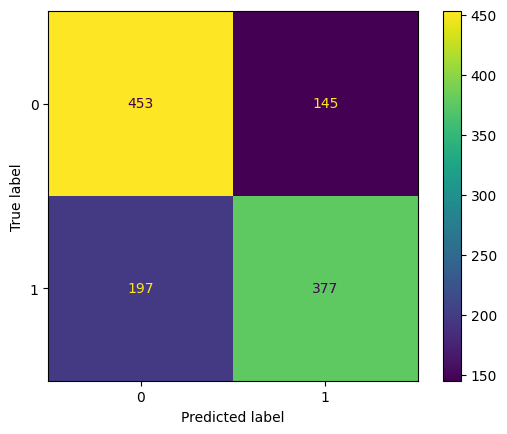

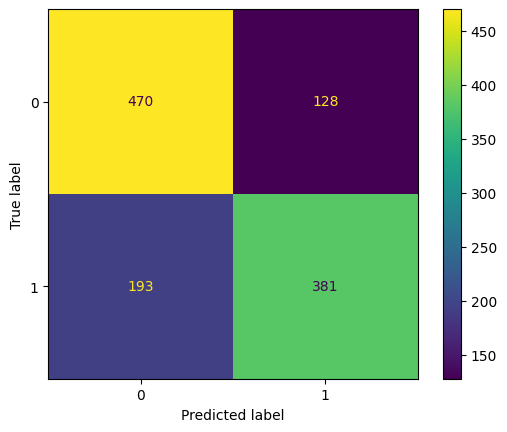

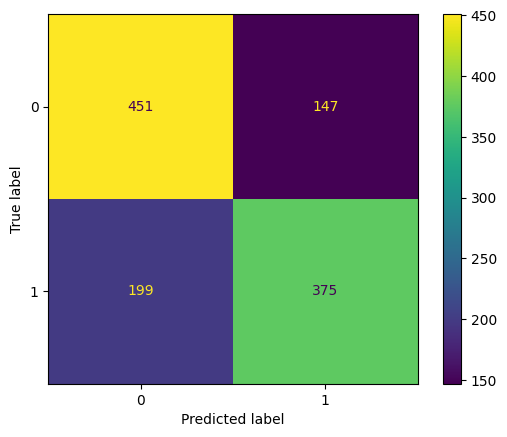

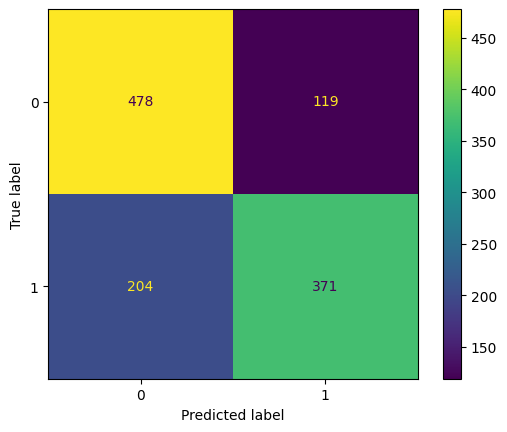

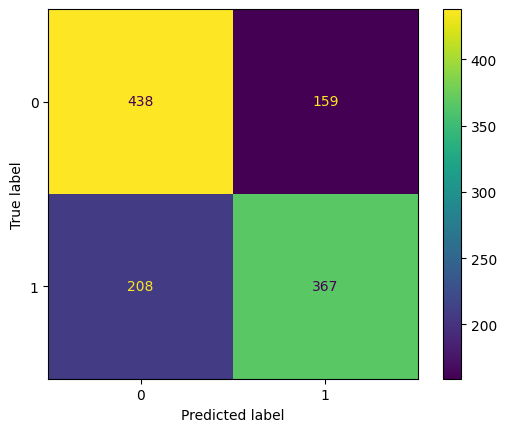

In [91]:
for rep in validation_errors:
    rep["confusion_matrix"].plot()
    plt.show()

Previously, the average `F2-Score` for the `Ada Boost` model was `0.665525` or about `66.5%`.
Next we will perform hyperparameter tuning on the Ada Boost model to get even better results.

---
## Hyperparamater Tuning

At this point, we will focus on the Adaboost model but still try to compare it with several other models to test whether Adaboost is the most suitable and has the most optimal results after hyperparameter tuning. Other models that we will try to compare with Adaboost are Logistic Regression (second highest F2 score) and one of the other boosting algorithms, Gradient Boosting Classifier.

### Before Tuning

In [92]:
list_algo = ["Adaboost", "Logistic Regression", "Gradien Boosting"]
score_before = []

F2-score before tuning : 0.6473789745058722


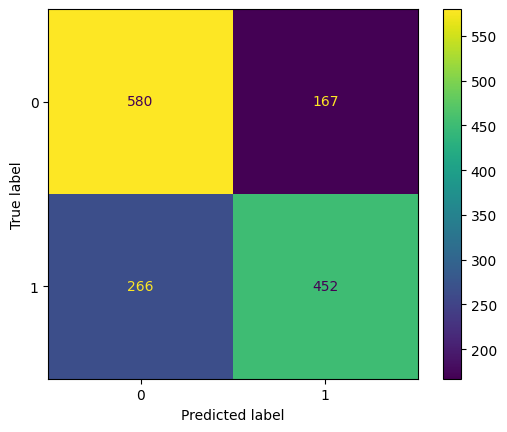

In [93]:
# Adaboost
ada_boost = AdaBoostClassifier(random_state = 42)

model = Pipeline([
    ("transform", transformer),
    ("model", ada_boost)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f2_score_before = fbeta_score(y_test, y_pred, beta = 2)
score_before.append(f2_score_before)
print(f"F2-score before tuning : {f2_score_before}")

cm_adaboost_before = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp_adaboost_before = ConfusionMatrixDisplay(confusion_matrix = cm_adaboost_before, display_labels = model.classes_)
disp_adaboost_before.plot()
plt.show()

The `F2-Score` for the `Ada Boost` model with default hyperparameter is 0.647 or about `64.7%`. There are `167` customers who were predicted to deposit but did not deposit (`False Positive`). While for (`False Negative`) there are `266` prediction errors that were initially predicted not to deposit but did deposit. This can cause the bank to lose business opportunities and potential revenue. In the context of bank marketing, every lost customer can be a significant financial loss. Therefore, we will prioritize reducing FN number ( through maximizing the number of True Positives) as this can help the bank maximize business opportunities and revenue. The bank may be more willing to lose opportunities than to spend additional resources on uninterested customers.

For comparison purposes, we will also try to see the score using Logistic Regression and Gradient Boost below.

F2-score before tuning : 0.6543105869137882


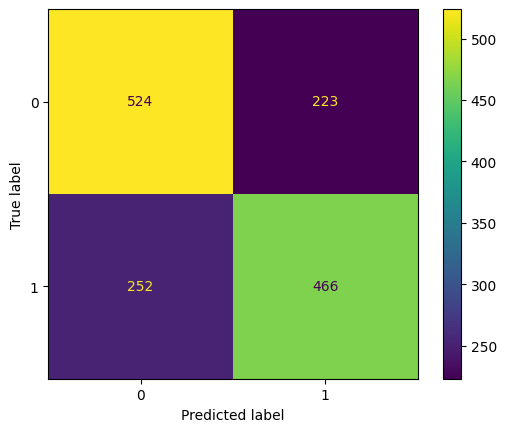

In [94]:
# Logistic Regression
logreg = LogisticRegression(random_state = 42)

model = Pipeline([
    ("transform", transformer),
    ("model", logreg)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f2_score_before = fbeta_score(y_test, y_pred, beta = 2)
score_before.append(f2_score_before)
print(f"F2-score before tuning : {f2_score_before}")

cm_logreg_before = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp_logreg_before = ConfusionMatrixDisplay(confusion_matrix = cm_logreg_before, display_labels = model.classes_)
disp_logreg_before.plot()
plt.show()

Logistic Regression :
* F2-Score : 0.654 or about `65,4%`
* False Positive : `223`
* False Negative : `252` 

F2-score before tuning : 0.6550532680679528


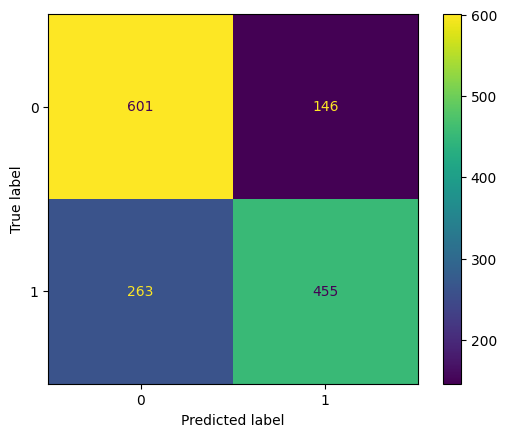

In [95]:
# Gradien Boosting
gb = GradientBoostingClassifier(random_state = 42)

model = Pipeline([
    ("transform", transformer),
    ("model", gb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f2_score_before = fbeta_score(y_test, y_pred, beta = 2)
score_before.append(f2_score_before)
print(f"F2-score before tuning : {f2_score_before}")

cm_gb_before = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb_before, display_labels = model.classes_)
disp_gb.plot()
plt.show()

Gradient Boosting :
* F2-Score : 0.655 or about `65,5%`
* False Positive : `146`
* False Negative : `263` 

The following shows the score comparison of the three previous models.

In [96]:
pd.DataFrame({
    "model" : list_algo,
    "f2-Score before" : score_before
})

,model,f2-Score before
0,Adaboost,0.647379
1,Logistic Regression,0.654311
2,Gradien Boosting,0.655053


### After Tuning

Since we are focusing on using the Adaboost algorithm, we will try to see the default hyperparameters of the Adaboost algorithm first.

In [97]:
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

The following is an explanation of the hyperparmeter of Adaboost

* algorithm: Boosting algorithm
* estimator: The base estimator from which the boosted ensemble is created.
* learning_rate : The weights applied to each classifier in each boosting iteration.
* n_estimators : Maximum number of estimators at which boosting is stopped.
* random_state : Controls the random seed assigned to each estimator in each boosting iteration.

The base_estimator hyperparameter has been deprecated.

Next, we will tune the existing hyperparameters to find the best combination of hyperparameters to build a much better model. For a more complete explanation of the Adaboost hyperparameters, accessible [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

In [98]:
score_after = []

In [99]:
# Adaboost
hyperparam_space_adaboost = {
    "model__algorithm" : ["SAMME", "SAMME.R"],
    "model__learning_rate" : [1.0, 1.5, 0.5, 2.0],
    "model__estimator" : [None],
    "model__n_estimators" : [50, 100, 75, 25],
    "model__random_state" : [42]
}

ada_boost = AdaBoostClassifier(random_state = 42)
f2_score = make_scorer(fbeta_score, beta = 2)
model_adaboost = Pipeline([
    ("transform", transformer),
    ("model", ada_boost)
])

grid_search_adaboost = GridSearchCV(estimator = model_adaboost, param_grid = hyperparam_space_adaboost, cv = 5,
                           scoring = f2_score, n_jobs = -1, verbose = 1)
grid_search_adaboost.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_robust',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['month'],
                                                                                                         mapping=[{'col': 'month',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': jan    0 
feb    1 
mar    2 
apr    3 
may    4 
jun    5 
jul    6 
aug    7 
sep    8 
oct    9 
nov    10
dec    11
dtype: int64}])),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['month']),
                                                                        ('on...
                                                                          'pdays']),
                                                                        ('binary',
                                                                         BinaryEncoder(cols=['job']),
                                                                         ['job'])])),
                                       ('model',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__estimator': [None],
                         'model__learning_rate': [1.0, 1.5, 0.5, 2.0],
                         'model__n_estimators': [50, 100, 75, 25],
                         'model__random_state': [42]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [100]:
# Adaboost
best_estimator_adaboost = grid_search_adaboost.best_estimator_

best_estimator_adaboost.fit(X_train, y_train)
y_pred = best_estimator_adaboost.predict(X_test)
f2_score_after = fbeta_score(y_test, y_pred, beta = 2)
print(f"F2-Score before: {f2_score_before}")
print(f"F2-Score after: {f2_score_after}")
score_after.append(f2_score_after)

cm_adaboost_after = confusion_matrix(y_test, y_pred, labels = best_estimator_adaboost.classes_)
disp2_adaboost = ConfusionMatrixDisplay(confusion_matrix = cm_adaboost_after, display_labels = best_estimator_adaboost.classes_)
# display(disp.plot(), disp2.plot())
# plt.show()

F2-Score before: 0.6550532680679528
F2-Score after: 0.8018867924528301


In [101]:
# Logistic Regression
hyperparam_space_logreg = {
    "model__class_weight" : ["balanced", None],
    "model__penalty" : ["l1", "l2", "elasticnet", None],
    "model__max_iter" : [75, 100, 125, 150, 175, 200],
    "model__n_jobs" : [-1],
    "model__random_state" : [42],
    "model__multi_class" : ["auto", "ovr", "multinomial"]
}

logreg = LogisticRegression(random_state = 42)
f2_score = make_scorer(fbeta_score, beta = 2)
model_logreg = Pipeline([
    ("transform", transformer),
    ("model", logreg)
])

grid_search_logreg = GridSearchCV(estimator = model_logreg, param_grid = hyperparam_space_logreg, cv = 5,
                           scoring = f2_score, n_jobs = -1, verbose = 1)
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_robust',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['month'],
                                                                                                         mapping=[{'col': 'month',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': jan    0 
feb    1 
mar    2 
apr    3 
may    4 
jun    5 
jul    6 
aug    7 
sep    8 
oct    9 
nov    10
dec    11
dtype: int64}])),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['month']),
                                                                        ('on...
                                                                         ['job'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', None],
                         'model__max_iter': [75, 100, 125, 150, 175, 200],
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__n_jobs': [-1],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__random_state': [42]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [102]:
# Logistic regression
best_estimator_logreg = grid_search_logreg.best_estimator_

best_estimator_logreg.fit(X_train, y_train)
y_pred = best_estimator_logreg.predict(X_test)
f2_score_after = fbeta_score(y_test, y_pred, beta = 2)
print(f"F2-Score before: {f2_score_before}")
print(f"F2-Score after: {f2_score_after}")
score_after.append(f2_score_after)

cm_logreg_after = confusion_matrix(y_test, y_pred, labels = best_estimator_logreg.classes_)
disp2_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_logreg_after, display_labels = best_estimator_logreg.classes_)
# display(disp.plot(), disp2.plot())
# plt.show()

F2-Score before: 0.6550532680679528
F2-Score after: 0.6606145251396649


In [103]:
# Gradient Boosting
hyperparam_space_gb = {
    "model__learning_rate" : [0.01, 0.001],
    "model__n_estimators" : [50, 100, 150],
    "model__criterion" : ["friedman_mse", "squared_error"],
    "model__min_samples_split" : [i for i in range (2, 6)],
    "model__min_samples_leaf" : [i for i in range (2, 6)],
    "model__max_features" : ["auto", "sqrt", "log2"]
}

gb = GradientBoostingClassifier(random_state = 42)
f2_score = make_scorer(fbeta_score, beta = 2)
model_gb = Pipeline([
    ("transform", transformer),
    ("model", gb)
])

grid_search_gb = GridSearchCV(estimator = model_gb, param_grid = hyperparam_space_gb, cv = 5,
                           scoring = f2_score, n_jobs = -1, verbose = 1)
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_robust',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['month'],
                                                                                                         mapping=[{'col': 'month',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': jan    0 
feb    1 
mar    2 
apr    3 
may    4 
jun    5 
jul    6 
aug    7 
sep    8 
oct    9 
nov    10
dec    11
dtype: int64}])),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['month']),
                                                                        ('on...
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['friedman_mse', 'squared_error'],
                         'model__learning_rate': [0.01, 0.001],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [2, 3, 4, 5],
                         'model__min_samples_split': [2, 3, 4, 5],
                         'model__n_estimators': [50, 100, 150]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [104]:
# Gradient Boosting
best_estimator_gb = grid_search_logreg.best_estimator_

best_estimator_gb.fit(X_train, y_train)
y_pred = best_estimator_gb.predict(X_test)
f2_score_after = fbeta_score(y_test, y_pred, beta = 2)
print(f"F2-Score before: {f2_score_before}")
print(f"F2-Score after: {f2_score_after}")
score_after.append(f2_score_after)

cm_gb_after = confusion_matrix(y_test, y_pred, labels = best_estimator_gb.classes_)
disp2_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_gb_after, display_labels = best_estimator_gb.classes_)
# display(disp.plot(), disp2.plot())
# plt.show()

F2-Score before: 0.6550532680679528
F2-Score after: 0.6606145251396649


In [105]:
pd.DataFrame({
    "model" : list_algo,
    "f2-Score before" : score_before,
    "f2-Score after" : score_after
})

,model,f2-Score before,f2-Score after
0,Adaboost,0.647379,0.801887
1,Logistic Regression,0.654311,0.660615
2,Gradien Boosting,0.655053,0.660615


It can be seen that the `Adaboost` model is the `most suitable model` for this dataset and has a `better` performance improvement than the other 2 models after hyperparameter tuning. There is an increase in performance from about 0.647 to 0.801 or from `64.7%` to `80.2%`.

In [106]:
grid_search_adaboost.best_params_

{'model__algorithm': 'SAMME',
 'model__estimator': None,
 'model__learning_rate': 2.0,
 'model__n_estimators': 50,
 'model__random_state': 42}

Thus we get the best hyperparameters for the Ada Boost model that has been created with the following details.
* algorithm : `"SAMME"`
* estimator : `None`
* learning_rate : `2.0`
* n_estimator : `50`
* random_state : `42`

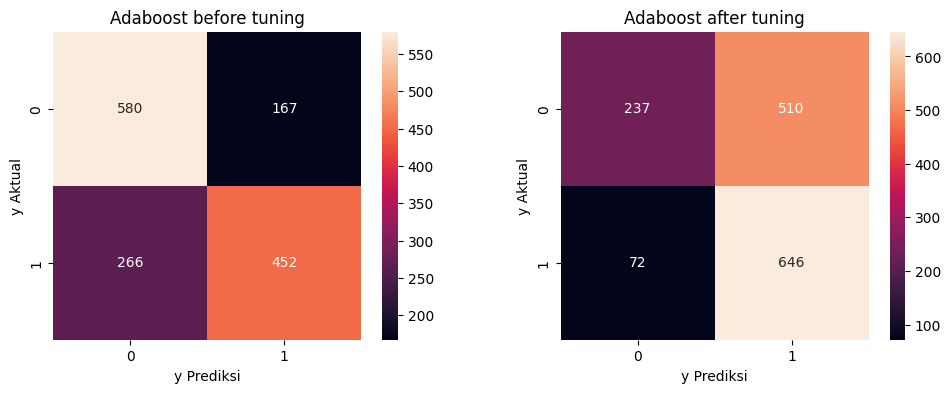

In [107]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(cm_adaboost_before, annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost before tuning')

# Model Random Forest after tuning
plt.subplot(1,2,2)
sns.heatmap(cm_adaboost_after, annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost after tuning')

plt.show()

Previously we knew that there was an `increase in F2-Score` after we did the tuning which was initially `64.7%` up to `80.2%`. This means that there are fewer False Negative predictions than before tuning and can increase the number of True Positive predictions. Even though the False Positive also increases, the costs incurred for campaigns against customers who are predicted to deposit but do not deposit can be covered by the increase in depositing customers. It is even possible that the profit from depositing customers obtained can exceed the costs spent on the campaign.

Thus, we will use the tuned model as the best model in this prediction.

Here is the `Summary` of the best model prediction results.

1. The model has a correct prediction probability for customers who deposit and do not deposit ((TP + TN) / Total) or known as `Accuracy` about `60.3%`.

1. The `Error rate` of the model used is `39.7%`.

1. The model has a correct prediction probability for customers who will deposit (TP / (TP + FN)) or known as `Sensitivity` about `89.9%`.

1. The model has a correct prediction probability for customers who will not deposit (TN / (TN + FP)) or known as `Specificity` about `31.7%`.

1. The model has a probability of correct prediction for customers who will deposit with more sensitivity but still consider the precision using `F2-Score` ((1 + 2^2) * (precision * recall) / ((2^2 * precision) + recall)) about `80.2%`.

---
## Feature Importance

Next, we will find out which features are most important in this model for classifying customers who will deposit and not deposit.

In [108]:
transformer.get_feature_names_out()

array(['ord_robust__month', 'onehot__housing_yes', 'onehot__loan_yes',
       'onehot__contact_other', 'onehot__contact_telephone',
       'onehot__poutcome_other', 'onehot__poutcome_success',
       'onehot__poutcome_unknown', 'robust__age', 'robust__balance',
       'robust__campaign', 'robust__pdays', 'binary__job_0',
       'binary__job_1', 'binary__job_2', 'binary__job_3'], dtype=object)

In [109]:
best_estimator_adaboost

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['month'],
                                                                                  mapping=[{'col': 'month',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': jan    0 
feb    1 
mar    2 
apr    3 
may    4 
jun    5 
jul    6 
aug    7 
sep    8 
oct    9 
nov    10
dec    11
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['month']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('robust', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('binary',
                                                  BinaryEncoder(cols=['job']),
                                                  ['job'])])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=2.0,
                                    random_state=42))])

In [110]:
feature_importance = pd.Series(best_estimator_adaboost["model"].feature_importances_, 
                               transformer.get_feature_names_out()
                               ).sort_values(ascending = False).reset_index().rename(columns = {"index" : "feature", 0 : "importance"})

def feature(x):
    return x.split("__")[1]

feature_importance["feature"] = feature_importance["feature"].apply(feature)
feature_importance

,feature,importance
0,contact_other,0.990028
1,poutcome_success,0.009972
2,month,0.000000
3,housing_yes,0.000000
4,loan_yes,0.000000
5,contact_telephone,0.000000
6,poutcome_other,0.000000
7,poutcome_unknown,0.000000
8,age,0.000000
9,balance,0.000000


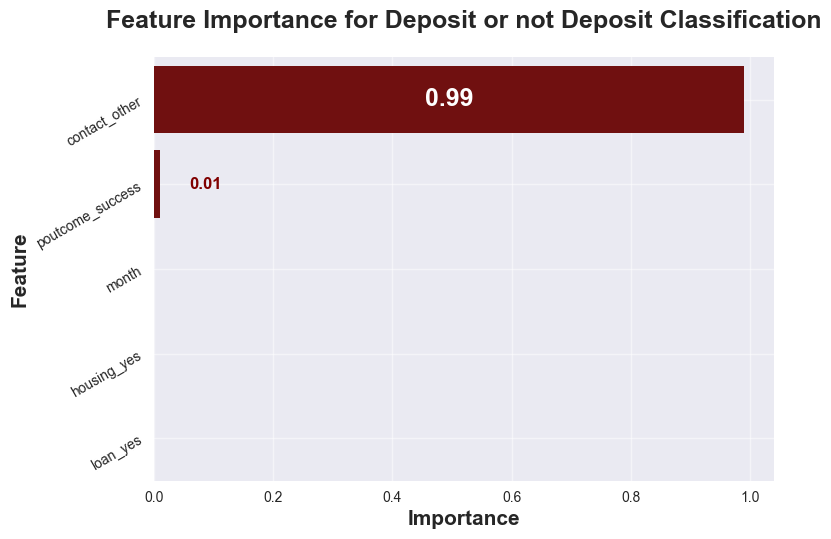

In [111]:
plt.style.use("seaborn")
sns.barplot(data = feature_importance.head(5), x = "importance", y = "feature",
            color = "maroon")
plt.annotate(text = "0.99", xy = (feature_importance["importance"][0]/2, 0),
             ha = "center", va = "center", color = "white", fontweight = "bold",
             size = 18)
plt.annotate(text = "0.01", xy = (feature_importance["importance"][1] + 0.05, 1),
             ha = "left", va = "center", color = "maroon", fontweight = "bold",
             size = 12)
plt.grid(alpha = 0.5)
plt.yticks(rotation = 30)
plt.xlabel("Importance", fontweight = "bold", size = 15)
plt.ylabel("Feature", fontweight = "bold", size = 15)
plt.title("Feature Importance for Deposit or not Deposit Classification", size = 18, fontweight = "bold",
          y = 1.05)
plt.show()

* It can be seen that the most important feature to classify customers who will deposit and who will not deposit is contact_other (the type of communication made to customers other than cellular and telephone). In this analysis, we cannot draw more information because there is no specific data other than customers contacted by cellular and telephone. 

* In addition, the success of the last marketing to the customer is the most important to classify the customers who will deposit and who will not deposit.

---
## Conclusion

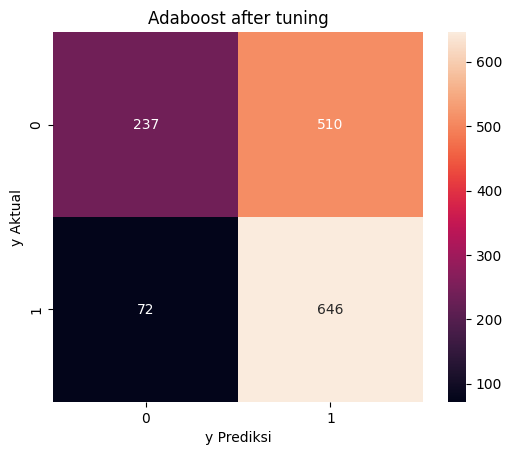

In [112]:
plt.style.use("default")
sns.heatmap(cm_adaboost_after, annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost after tuning')

plt.show()

Based on the confusion matrix of the final model, we can conclude that:

1. With an `Accuracy` of `60.3%`, the `model` is still not good` when used to predict both classes ( `customers who deposit and those who do not deposit`). This happens because of the trade-off between recall and precision. Since we are focusing on `more correct predictions` for customers who will `deposit`, the `correct predictions` for customers who `do not deposit` will `decrease`. The `Error rate` in the model used is `39.7%`.

1. With `Sensitivity` of about `89.9%`, the model is fairly `good` if used to `predict` the positive class ( `customers who deposit`).

1. With a `Specificity` of about `31.7%`, the model is very `bad` when used to `predict` the negative class (`customers who will not deposit`).

1. With a `F2-Score` of around `80.2%`, the model is fairly `good enough` if used to `predict` customers who will `deposit and not deposit` with more `emphasis` on the positive class ( `customers who deposit`).

The most important `feature` in `classifying` customers who will `deposit` and who will `not deposit` is the `contact_other` feature (the last type of communication made to the customer other than celullar and telephone) followed by the `outcome_success` feature (the result of the customer`s last successful marketing campaign). 

In addition, according to [thefinancialbrand.com](https://thefinancialbrand.com/news/bank-marketing/bank-marketing-budgets-advertising-roi-strategy-88835/), if a bank's marketing campaign cost is $1 and the total time spent on marketing per customer is 5 minutes then: 
1. `Without` using machine learning `model` (all customers are assumed to be interested in depositing)

    Based on the confusion matrix, if all customers are assumed to be interested then there are 1465 total customers and only 718 people are interested in depositing, then:
    * Total cost spent: 1465 x $1 = $1465
    * `Loss` of : (1465 - 718) x $1 = `$747`
    * `Total time` spent : 1465 x 5 = 7325 minutes or approximately `122.08 hours`.

2. Using machine learning models (based on confusion matrix: 646 predicted correct deposit and 510 predicted deposit but did not deposit)

    Based on the confusion matrix, if there are 1156 customers predicted to deposit and there are only 646 people predicted to deposit correctly, then:
    * Total cost spent: 1156 x $1 = $1156
    * `Loss` of : (1156 - 646) x $1 = `$510`
    * Total time spent: 1156 x 5 = 5780 minutes or approximately `96.33 hours`.

This way the bank has `saved` about (747 - 510) = `$237` around marketing cost or in other words `reduced` marketing `loss` by `31.7%`. In addition, the bank can also save about (122.08 - 96.33) = `25.75 hours` or `reduce the time spent` to contact each customer by about `21.09%`.

---
## Recommendation

Things that can be done to improve the project and model for the future are as follows.
* The `other` data in the `contact` feature should be made `more specific`. By making the data of the contact feature more specific besides cellular and telephone (for example: `email`, `whatsapp`, `facebook`, or `other` platforms) so that the information that can be obtained for the most important features in the classification of determining whether a customer will deposit or not can be clearer and better.
* Adding new data/features such as `marketing cost` for `each customer` and `profit` earned `from` marketing done by `each customer`. With this we can do further analysis on the efficiency of marketing done to customers. This `data` can also be used to do `profit calculation` if we use the model that has been created. 
* Add more data from the bank itself so that the predictions made can be better.
* Using a wider `hyperparameter space` to find the best `hyperparameter` if still using the `Adaboost` model.

---
## Reference

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://www.youtube.com/watch?v=LsK-xG1cLYA

https://thefinancialbrand.com/news/bank-marketing/bank-marketing-budgets-advertising-roi-strategy-88835/

---
### Save Model

In [113]:
import pickle

final_model = pickle.dump(best_estimator_adaboost, open('model.sav', 'wb'))
final_model = pickle.load(open('model.sav', 'rb'))
final_model

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['month'],
                                                                                  mapping=[{'col': 'month',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': jan    0 
feb    1 
mar    2 
apr    3 
may    4 
jun    5 
jul    6 
aug    7 
sep    8 
oct    9 
nov    10
dec    11
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['month']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('robust', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('binary',
                                                  BinaryEncoder(cols=['job']),
                                                  ['job'])])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=2.0,
                                    random_state=42))])